In [1]:
import pandas as pd
import numpy as np

# 머신러닝 : 교통사고 발생 건수 예측
- 발생 월, 요일, 지역 정보를 이용하여 사고 건수 예측

## 데이터 불러오기 및 데이터 프레임 만들기

In [2]:
list_2015_seoul = pd.read_html('data/교통사고_서울_2016.xls')
df_2015_seoul = pd.DataFrame(list_2015_seoul[0])

In [3]:
list_2016_seoul = pd.read_html('data/교통사고_서울_2016.xls')
df_2016_seoul = pd.DataFrame(list_2016_seoul[0])

In [4]:
list_2017_seoul = pd.read_html('data/교통사고_서울_2017.xls')
df_2017_seoul = pd.DataFrame(list_2017_seoul[0])

In [5]:
list_2018_seoul = pd.read_html('data/교통사고_서울_2018.xls')
df_2018_seoul = pd.DataFrame(list_2018_seoul[0])

In [6]:
list_2019_seoul = pd.read_html('data/교통사고_서울_2019.xls')
df_2019_seoul = pd.DataFrame(list_2019_seoul[0])

In [7]:
list_2020_seoul = pd.read_html('data/교통사고_서울_2020.xls')
df_2020_seoul = pd.DataFrame(list_2020_seoul[0])
# 2021년 데이터는 노면상태가 없어 사용하지 않음

In [8]:
df_2019_seoul

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100001,2019년 1월 1일 00시,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,26세,상해없음,보행자,남,40세,경상
1,2019010100100002,2019년 1월 1일 00시,화요일,서울특별시 구로구 고척동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,이륜,남,23세,상해없음,승용,남,71세,경상
2,2019010100100003,2019년 1월 1일 00시,화요일,서울특별시 서초구 서초동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,기타 - 기타,승용,남,33세,상해없음,화물,남,51세,경상
3,2019010100100019,2019년 1월 1일 01시,화요일,서울특별시 중구 회현동2가,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 터널,승용,남,58세,상해없음,승용,남,62세,경상
4,2019010100100020,2019년 1월 1일 01시,화요일,서울특별시 성동구 행당동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로부근,승용,남,30세,상해없음,보행자,남,32세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39253,2019123100100610,2019년 12월 31일 22시,화요일,서울특별시 중랑구 면목동,부상신고사고,0,0,0,1,차대사람 - 차도통행중,...,맑음,단일로 - 기타,화물,남,28세,상해없음,보행자,여,33세,부상신고
39254,2019123100100611,2019년 12월 31일 22시,화요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,여,41세,상해없음,승용,여,61세,경상
39255,2019123100100612,2019년 12월 31일 22시,화요일,서울특별시 송파구 송파동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로부근,승용,남,36세,상해없음,보행자,여,18세,경상
39256,2019123100100634,2019년 12월 31일 23시,화요일,서울특별시 강남구 역삼동,부상신고사고,0,0,0,2,차량단독 - 기타,...,맑음,단일로 - 기타,승용,남,59세,상해없음,NaN,NaN,NaN,NaN


In [88]:
# 6개 DataFrame concat 하기
df_seoul = pd.concat([df_2016_seoul, df_2017_seoul, df_2018_seoul, df_2019_seoul, df_2020_seoul])

In [89]:
df_seoul.reset_index(drop=True)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상
191940,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,...,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상
191941,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상
191942,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상


## 데이터 피쳐 탐색

In [90]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191944 entries, 0 to 35226
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사고번호        191944 non-null  int64 
 1   사고일시        191944 non-null  object
 2   요일          191944 non-null  object
 3   시군구         191944 non-null  object
 4   사고내용        191944 non-null  object
 5   사망자수        191944 non-null  int64 
 6   중상자수        191944 non-null  int64 
 7   경상자수        191944 non-null  int64 
 8   부상신고자수      191944 non-null  int64 
 9   사고유형        191944 non-null  object
 10  법규위반        191944 non-null  object
 11  노면상태        191944 non-null  object
 12  기상상태        191944 non-null  object
 13  도로형태        191944 non-null  object
 14  가해운전자 차종    191944 non-null  object
 15  가해운전자 성별    191944 non-null  object
 16  가해운전자 연령    191944 non-null  object
 17  가해운전자 상해정도  191944 non-null  object
 18  피해운전자 차종    185992 non-null  object
 19  피해운전자 성별    185992 non-n

In [91]:
df_seoul

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016년 1월 1일 00시,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016년 1월 1일 00시,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016년 1월 1일 00시,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016년 1월 1일 00시,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016년 1월 1일 00시,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35222,2020123100100571,2020년 12월 31일 22시,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상
35223,2020123100100572,2020년 12월 31일 22시,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,...,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상
35224,2020123100100591,2020년 12월 31일 23시,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상
35225,2020123100100592,2020년 12월 31일 23시,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상


In [92]:
df_seoul.isnull().sum()

사고번호             0
사고일시             0
요일               0
시군구              0
사고내용             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종      5952
피해운전자 성별      5952
피해운전자 연령      5952
피해운전자 상해정도    5952
dtype: int64

In [93]:
df_seoul.groupby('요일').count()

,사고번호,사고일시,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
요일,,,,,,,,,,,,,,,,,,,,,
금요일,30726,30726,30726,30726,30726,30726,30726,30726,30726,30726,...,30726,30726,30726,30726,30726,30726,29817,29817,29817,29817
목요일,28447,28447,28447,28447,28447,28447,28447,28447,28447,28447,...,28447,28447,28447,28447,28447,28447,27581,27581,27581,27581
수요일,28207,28207,28207,28207,28207,28207,28207,28207,28207,28207,...,28207,28207,28207,28207,28207,28207,27327,27327,27327,27327
월요일,27139,27139,27139,27139,27139,27139,27139,27139,27139,27139,...,27139,27139,27139,27139,27139,27139,26289,26289,26289,26289
일요일,21085,21085,21085,21085,21085,21085,21085,21085,21085,21085,...,21085,21085,21085,21085,21085,21085,20311,20311,20311,20311
토요일,28532,28532,28532,28532,28532,28532,28532,28532,28532,28532,...,28532,28532,28532,28532,28532,28532,27676,27676,27676,27676
화요일,27808,27808,27808,27808,27808,27808,27808,27808,27808,27808,...,27808,27808,27808,27808,27808,27808,26991,26991,26991,26991


In [94]:
df_seoul.groupby('노면상태').count()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
노면상태,,,,,,,,,,,,,,,,,,,,,
비포장 - 건조,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,67,67,67,67
비포장 - 기타,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,26,26,26,26
비포장 - 서리/결빙,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
비포장 - 습기,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,10,10,10,10
비포장 - 적설,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
비포장 - 젖음/습기,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,52,52,52,52
비포장 - 해빙,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
포장 - 건조,172800,172800,172800,172800,172800,172800,172800,172800,172800,172800,...,172800,172800,172800,172800,172800,172800,167639,167639,167639,167639
포장 - 결빙,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,65,65,65,65


In [95]:
df_seoul[df_seoul['노면상태'] == '-']

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도


In [96]:
df_seoul.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [97]:
df_seoul.groupby('도로형태').count()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,노면상태,기상상태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
도로형태,,,,,,,,,,,,,,,,,,,,,
교차로 - 교차로부근,28797,28797,28797,28797,28797,28797,28797,28797,28797,28797,...,28797,28797,28797,28797,28797,28797,28088,28088,28088,28088
교차로 - 교차로안,45842,45842,45842,45842,45842,45842,45842,45842,45842,45842,...,45842,45842,45842,45842,45842,45842,45351,45351,45351,45351
교차로 - 교차로횡단보도내,5668,5668,5668,5668,5668,5668,5668,5668,5668,5668,...,5668,5668,5668,5668,5668,5668,5654,5654,5654,5654
기타 - 기타,8577,8577,8577,8577,8577,8577,8577,8577,8577,8577,...,8577,8577,8577,8577,8577,8577,8268,8268,8268,8268
단일로 - 고가도로위,594,594,594,594,594,594,594,594,594,594,...,594,594,594,594,594,594,546,546,546,546
단일로 - 교량,1609,1609,1609,1609,1609,1609,1609,1609,1609,1609,...,1609,1609,1609,1609,1609,1609,1521,1521,1521,1521
단일로 - 기타,96207,96207,96207,96207,96207,96207,96207,96207,96207,96207,...,96207,96207,96207,96207,96207,96207,92094,92094,92094,92094
단일로 - 지하차도(도로)내,1179,1179,1179,1179,1179,1179,1179,1179,1179,1179,...,1179,1179,1179,1179,1179,1179,1109,1109,1109,1109
단일로 - 터널,626,626,626,626,626,626,626,626,626,626,...,626,626,626,626,626,626,568,568,568,568


In [98]:
df_seoul.groupby('기상상태').count()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,노면상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
기상상태,,,,,,,,,,,,,,,,,,,,,
기타,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,...,1932,1932,1932,1932,1932,1932,1870,1870,1870,1870
눈,662,662,662,662,662,662,662,662,662,662,...,662,662,662,662,662,662,630,630,630,630
맑음,170063,170063,170063,170063,170063,170063,170063,170063,170063,170063,...,170063,170063,170063,170063,170063,170063,164911,164911,164911,164911
비,11497,11497,11497,11497,11497,11497,11497,11497,11497,11497,...,11497,11497,11497,11497,11497,11497,11044,11044,11044,11044
안개,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,19,19,19,19
흐림,7769,7769,7769,7769,7769,7769,7769,7769,7769,7769,...,7769,7769,7769,7769,7769,7769,7518,7518,7518,7518


In [99]:
# 판다스 지수표현 옵션
#pd.options.display.float_format = '{:.0f}'.format
#pd.reset_option('display.float_format')

In [100]:
df_seoul.reset_index(drop=True, inplace=True)

# 데이터 전처리
1. 사고일시를 datetime 형태로 변경할 것.
2. 범주형 데이터들의 인코딩
3. 시군구 컬림에서 동을 제외하고 구까지만 사용하기
    - 해당 시군구에서 발생하는 사고 건수를 예측하는 것.
4. y값을... 무엇으로?

### 사고 일시를 date time 객체로 변환시키기

In [103]:
# pd.to_datetime 함수 사용
format = '%Y년 %m월 %d일 %H시'
df_seoul['사고일시'] = pd.to_datetime(df_seoul['사고일시'], format=format)

## 발생지 시군구를 구 단위 까지만 남기기

In [104]:
df_seoul

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016-01-01 00:00:00,금요일,서울특별시 중구 봉래동2가,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016-01-01 00:00:00,금요일,서울특별시 동대문구 답십리동,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016-01-01 00:00:00,금요일,서울특별시 영등포구 영등포동1가,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016-01-01 00:00:00,금요일,서울특별시 중랑구 면목동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016-01-01 00:00:00,금요일,서울특별시 양천구 신월동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020-12-31 22:00:00,목요일,서울특별시 동대문구 제기동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상
191940,2020123100100572,2020-12-31 22:00:00,목요일,서울특별시 강동구 강일동,경상사고,0,0,1,0,차대차 - 정면충돌,...,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상
191941,2020123100100591,2020-12-31 23:00:00,목요일,서울특별시 강남구 삼성동,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상
191942,2020123100100592,2020-12-31 23:00:00,목요일,서울특별시 송파구 신천동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상


In [105]:
def remain_gu(str):
    remain_list = str.split(' ')
    result = remain_list[-2]
    return result

In [106]:
df_seoul['시군구'] = df_seoul['시군구'].apply(remain_gu)

In [107]:
df_seoul

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2016010100100001,2016-01-01 00:00:00,금요일,중구,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,57세,상해없음
1,2016010100100002,2016-01-01 00:00:00,금요일,동대문구,경상사고,0,0,1,0,차대차 - 측면직각충돌,...,흐림,교차로 - 교차로부근,승용,남,55세,상해없음,승용,남,53세,경상
2,2016010100100003,2016-01-01 00:00:00,금요일,영등포구,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로부근,승용,남,54세,기타불명,승용,여,22세,경상
3,2016010100100004,2016-01-01 00:00:00,금요일,중랑구,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,이륜,남,16세,상해없음,자전거,남,69세,경상
4,2016010100100005,2016-01-01 00:00:00,금요일,양천구,중상사고,0,1,0,0,차대사람 - 차도통행중,...,맑음,단일로 - 기타,승용,남,56세,상해없음,보행자,여,83세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191939,2020123100100571,2020-12-31 22:00:00,목요일,동대문구,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,화물,남,35세,상해없음,자전거,남,41세,경상
191940,2020123100100572,2020-12-31 22:00:00,목요일,강동구,경상사고,0,0,1,0,차대차 - 정면충돌,...,흐림,교차로 - 교차로부근,승용,남,61세,상해없음,승용,남,21세,경상
191941,2020123100100591,2020-12-31 23:00:00,목요일,강남구,경상사고,0,0,2,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승용,남,55세,기타불명,승용,남,29세,경상
191942,2020123100100592,2020-12-31 23:00:00,목요일,송파구,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,62세,상해없음,이륜,남,22세,중상


### 사고 일시 쪼개기
- 발생연도, 발생월, 발생 시간을 피쳐로 사용하기 위해 사고 일시를 쪼갬

In [200]:
df_seoul['발생연도'] = df_seoul['사고일시'].dt.year
df_seoul['발생월'] = df_seoul['사고일시'].dt.month
df_seoul['발생일자'] = df_seoul['사고일시'].dt.day
df_seoul['발생시간'] = df_seoul['사고일시'].dt.hour

In [203]:
df_seoul.groupby(['발생시간']).count()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,발생연도,발생월,발생일자
발생시간,,,,,,,,,,,,,,,,,,,,,
0,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,...,6819,6819,6819,6548,6548,6548,6548,6819,6819,6819
1,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635,...,5635,5635,5635,5376,5376,5376,5376,5635,5635,5635
2,4347,4347,4347,4347,4347,4347,4347,4347,4347,4347,...,4347,4347,4347,4078,4078,4078,4078,4347,4347,4347
3,3355,3355,3355,3355,3355,3355,3355,3355,3355,3355,...,3355,3355,3355,3115,3115,3115,3115,3355,3355,3355
4,3347,3347,3347,3347,3347,3347,3347,3347,3347,3347,...,3347,3347,3347,3104,3104,3104,3104,3347,3347,3347
5,3965,3965,3965,3965,3965,3965,3965,3965,3965,3965,...,3965,3965,3965,3759,3759,3759,3759,3965,3965,3965
6,4371,4371,4371,4371,4371,4371,4371,4371,4371,4371,...,4371,4371,4371,4216,4216,4216,4216,4371,4371,4371
7,5802,5802,5802,5802,5802,5802,5802,5802,5802,5802,...,5802,5802,5802,5625,5625,5625,5625,5802,5802,5802
8,9202,9202,9202,9202,9202,9202,9202,9202,9202,9202,...,9202,9202,9202,8940,8940,8940,8940,9202,9202,9202


### 사고일시 기준으로 묶어서 새로운 DataFrame 만들기
- groupby를 이용해 묶은 후에, 새로운 데이터 프레임을 만든다.
- 사고일시, 시군구를 기준으로 발생 건수를 정리

In [140]:
# 사고 일시 별 사고 건수 확인
acc_sum = df_seoul.groupby(['사고일시']).count()['사고번호']

pandas.core.series.Series

In [172]:
temp_sum = pd.DataFrame(acc_sum)

In [162]:
# temp_sum = pd.DataFrame(df_seoul.groupby('사고일시')['사고일시'])
# temp_sum = pd.DataFrame(temp_sum[0])
# temp_sum['사고건수'] = acc_sum[0]

In [163]:
# temp_sum.rename(columns={0:'사고일시'}, inplace=True)
# temp_sum.set_index('사고일시', inplace=True)

In [147]:
temp_weekday = pd.DataFrame(df_seoul.groupby('사고일시')['요일'].unique())
# unique 메서드를 사용하지 않으면 값이 중복되어 들어오므로 값 하나만 추출

In [148]:
# unique 메서드는 ndarray로 리턴되기 때문에 값만 추출
temp_weekday['요일'] =temp_weekday['요일'].apply(lambda x: x[0])

In [119]:
temp_year = pd.DataFrame(df_seoul.groupby('사고일시')['발생연도'].unique())
temp_year['발생연도'] = temp_year['발생연도'].apply(lambda x: x[0])

In [149]:
temp_month = pd.DataFrame(df_seoul.groupby('사고일시')['발생월'].unique())
temp_month['발생월'] = temp_month['발생월'].apply(lambda x: x[0])

In [151]:
temp_day = pd.DataFrame(df_seoul.groupby('사고일시')['발생일자'].unique())
temp_day['발생일자'] = temp_day['발생일자'].apply(lambda x: x[0])

사고일자 기준 dataframe 합치기

In [176]:
result_df = temp_sum
df_list = [temp_sum, temp_weekday, temp_year, temp_month, temp_day]
for dataframe in df_list:
    result_df = pd.merge(result_df, dataframe, on='사고일시')

In [180]:
result_df = result_df.drop('사고번호_y', axis=1)
result_df = result_df.rename(columns={'사고번호_x': '사고건수'})

In [181]:
result_df

,사고건수,요일,발생연도,발생월,발생일자
사고일시,,,,,
2016-01-01 00:00:00,7,금요일,2016,1,1
2016-01-01 01:00:00,5,금요일,2016,1,1
2016-01-01 02:00:00,4,금요일,2016,1,1
2016-01-01 03:00:00,3,금요일,2016,1,1
2016-01-01 04:00:00,5,금요일,2016,1,1
...,...,...,...,...,...
2020-12-31 19:00:00,12,목요일,2020,12,31
2020-12-31 20:00:00,3,목요일,2020,12,31
2020-12-31 21:00:00,5,목요일,2020,12,31


sample을 랜덤하게 뽑아 산점도 그려보기

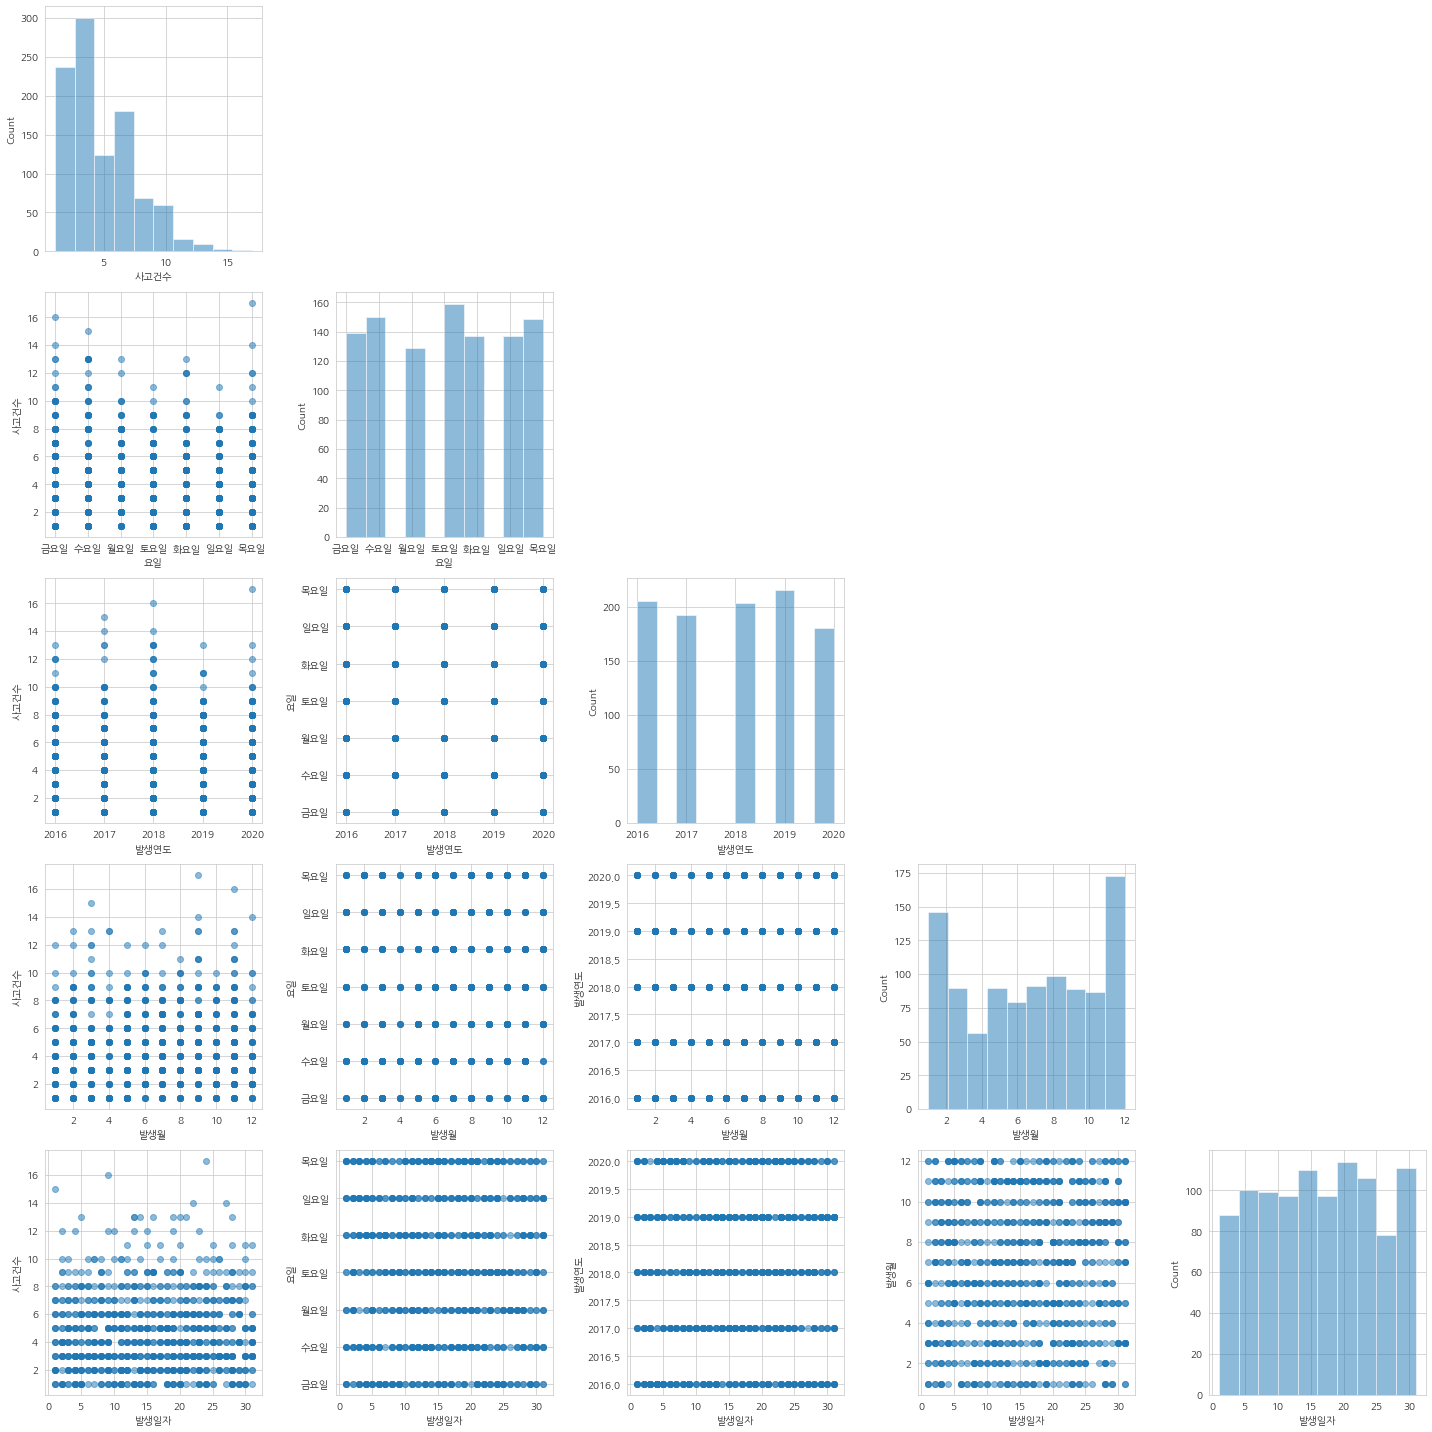

In [199]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
from mlxtend.plotting import scatterplotmatrix
import random

cols = list(result_df.columns)
value = random.sample(range(result_df.index.size), 1000)
scatterplotmatrix(result_df[cols].values[value], figsize=(20, 20),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [197]:
df_seoul.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '발생연도', '발생월', '발생일자'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191944 entries, 0 to 191943
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   사고번호        191944 non-null  int64         
 1   사고일시        191944 non-null  datetime64[ns]
 2   요일          191944 non-null  object        
 3   시군구         191944 non-null  object        
 4   사고내용        191944 non-null  object        
 5   사망자수        191944 non-null  int64         
 6   중상자수        191944 non-null  int64         
 7   경상자수        191944 non-null  int64         
 8   부상신고자수      191944 non-null  int64         
 9   사고유형        191944 non-null  object        
 10  법규위반        191944 non-null  object        
 11  노면상태        191944 non-null  object        
 12  기상상태        191944 non-null  object        
 13  도로형태        191944 non-null  object        
 14  가해운전자 차종    191944 non-null  object        
 15  가해운전자 성별    191944 non-null  object        
 16  가해